In [1]:
# KÜTÜPHANELER

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.decomposition import PCA

from sklearn.metrics import (
    accuracy_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#  VERİ YÜKLEME

def load_data():
    X_train = pd.read_csv("/content/drive/MyDrive/veri madenciliği 2/X_train.csv")
    X_test  = pd.read_csv("/content/drive/MyDrive/veri madenciliği 2/X_test.csv")
    y_train = pd.read_csv("/content/drive/MyDrive/veri madenciliği 2/y_train.csv").squeeze()
    y_test  = pd.read_csv("/content/drive/MyDrive/veri madenciliği 2/y_test.csv").squeeze()
    print("Veri başarıyla yüklendi.")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()

# One-Hot Encoding
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Eksik kolonları tamamla
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("One-Hot Encoding tamamlandı →", X_train.shape)


Veri başarıyla yüklendi.
One-Hot Encoding tamamlandı → (81410, 132)


In [3]:
#  MODEL EĞİTİM VE DEĞERLENDİRME

def evaluate_model(model, name, X_train, y_train, X_test, y_test, results):

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds)

    # ROC için probability
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    results.append([name, acc, f1, auc_score])

    print("\n=======================================================")
    print(f" MODEL: {name}")
    print("=======================================================")
    print(classification_report(y_test, preds))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return auc_score


In [4]:
# STANDARDİZASYON

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

print("Standartlaştırma tamamlandı.")


Standartlaştırma tamamlandı.


In [5]:
#  FEATURE SELECTION

def feature_selection_methods(X_train, y_train, X_test):

    selectors = {
        "Chi2 (15 Feature)": SelectKBest(chi2, k=15),
        "Mutual Info (15 Feature)": SelectKBest(mutual_info_classif, k=15),
        "RFE (LogReg, 15 Feature)": RFE(LogisticRegression(max_iter=1000), n_features_to_select=15)
    }

    results = {}

    for name, selector in selectors.items():
        selector.fit(abs(X_train), y_train)

        X_train_sel = selector.transform(abs(X_train))
        X_test_sel  = selector.transform(abs(X_test))

        results[name] = (X_train_sel, X_test_sel)
        print(f"{name} tamamlandı → {X_train_sel.shape}")

    return results

fs_results = feature_selection_methods(X_train_std, y_train, X_test_std)


Chi2 (15 Feature) tamamlandı → (81410, 15)
Mutual Info (15 Feature) tamamlandı → (81410, 15)
RFE (LogReg, 15 Feature) tamamlandı → (81410, 15)


In [6]:
#  PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca  = pca.transform(X_test_std)

print("PCA tamamlandı.")


PCA tamamlandı.


In [7]:
# MODELLER

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}



 MODEL: Logistic Regression – RAW
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.46      0.02      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.67      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



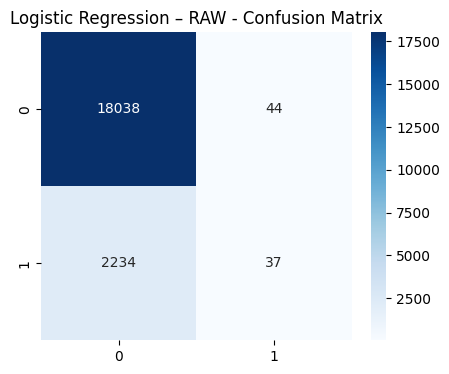


 MODEL: Naive Bayes – RAW
              precision    recall  f1-score   support

           0       0.99      0.02      0.04     18082
           1       0.11      1.00      0.20      2271

    accuracy                           0.13     20353
   macro avg       0.55      0.51      0.12     20353
weighted avg       0.89      0.13      0.06     20353



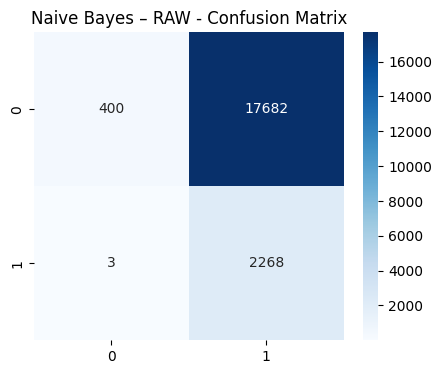


 MODEL: Logistic Regression – Chi2 (15 Feature)
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.46      0.02      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.68      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



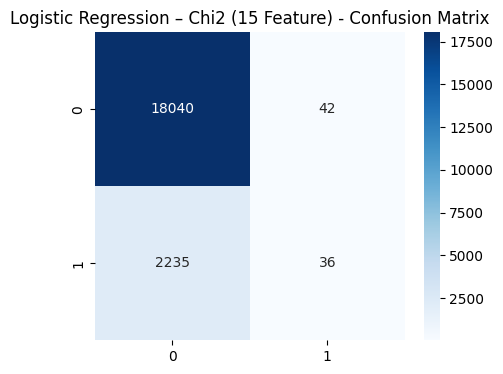


 MODEL: Naive Bayes – Chi2 (15 Feature)
              precision    recall  f1-score   support

           0       0.99      0.02      0.04     18082
           1       0.11      1.00      0.20      2271

    accuracy                           0.13     20353
   macro avg       0.55      0.51      0.12     20353
weighted avg       0.89      0.13      0.06     20353



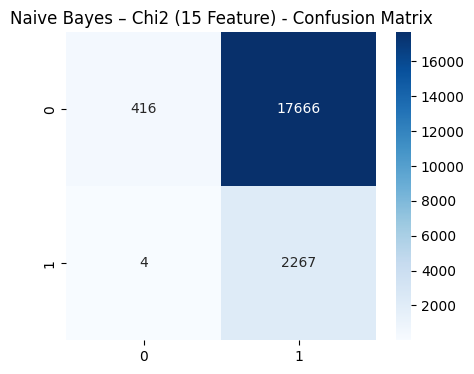


 MODEL: Logistic Regression – Mutual Info (15 Feature)
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.47      0.01      0.02      2271

    accuracy                           0.89     20353
   macro avg       0.68      0.51      0.48     20353
weighted avg       0.84      0.89      0.84     20353



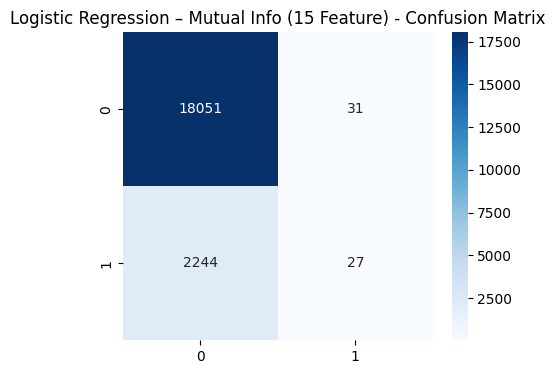


 MODEL: Naive Bayes – Mutual Info (15 Feature)
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     18082
           1       0.30      0.10      0.15      2271

    accuracy                           0.87     20353
   macro avg       0.60      0.53      0.54     20353
weighted avg       0.83      0.87      0.84     20353



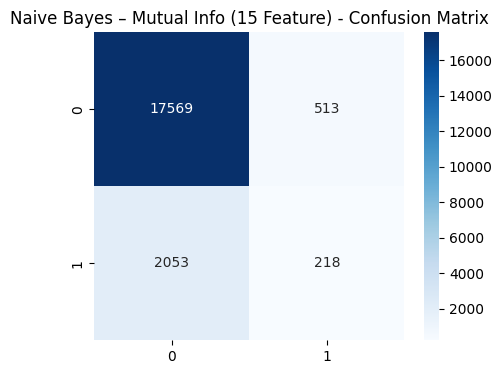


 MODEL: Logistic Regression – RFE (LogReg, 15 Feature)
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.48      0.01      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.68      0.51      0.48     20353
weighted avg       0.84      0.89      0.84     20353



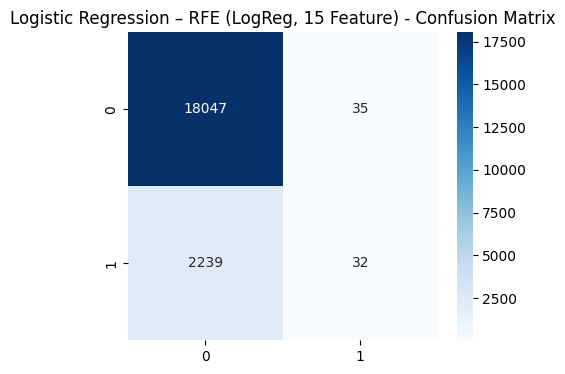


 MODEL: Naive Bayes – RFE (LogReg, 15 Feature)
              precision    recall  f1-score   support

           0       1.00      0.02      0.04     18082
           1       0.11      1.00      0.20      2271

    accuracy                           0.13     20353
   macro avg       0.56      0.51      0.12     20353
weighted avg       0.90      0.13      0.06     20353



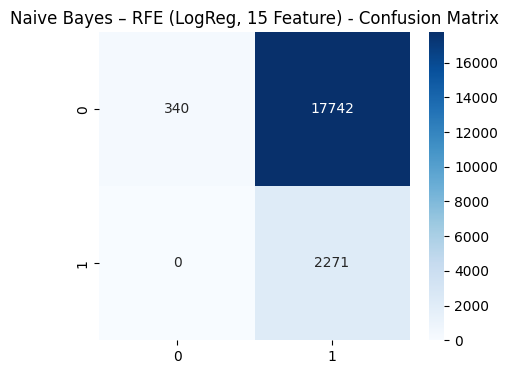


 MODEL: Logistic Regression – PCA
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.00      0.00      0.00      2271

    accuracy                           0.89     20353
   macro avg       0.44      0.50      0.47     20353
weighted avg       0.79      0.89      0.84     20353



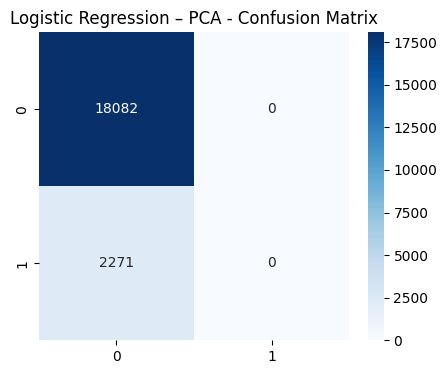


 MODEL: Naive Bayes – PCA
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.00      0.00      0.00      2271

    accuracy                           0.89     20353
   macro avg       0.44      0.50      0.47     20353
weighted avg       0.79      0.89      0.84     20353



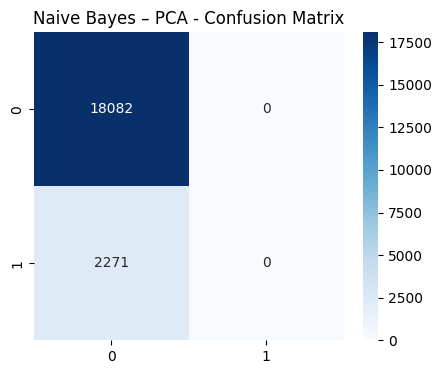

In [8]:
# MODEL EĞİTİMLERİ

results = []

# 1️⃣ RAW (Standardize edilmiş veri)
for name, model in models.items():
    evaluate_model(model, f"{name} – RAW", X_train_std, y_train, X_test_std, y_test, results)

# 2️⃣ Feature Selection Sonrası
for fs_name, (Xtr, Xte) in fs_results.items():
    for name, model in models.items():
        evaluate_model(model, f"{name} – {fs_name}", Xtr, y_train, Xte, y_test, results)

# 3️⃣ PCA
for name, model in models.items():
    evaluate_model(model, f"{name} – PCA", X_train_pca, y_train, X_test_pca, y_test, results)


,Model,Accuracy,F1 Score,AUC
0,Logistic Regression – RAW,0.888075,0.031463,0.677248
1,Naive Bayes – RAW,0.131086,0.204131,0.511762
2,Logistic Regression – Chi2 (15 Feature),0.888125,0.030651,0.616387
3,Naive Bayes – Chi2 (15 Feature),0.131823,0.204197,0.656183
4,Logistic Regression – Mutual Info (15 Feature),0.888223,0.023186,0.609907
5,Naive Bayes – Mutual Info (15 Feature),0.873925,0.145237,0.615974
6,"Logistic Regression – RFE (LogReg, 15 Feature)",0.888272,0.027374,0.634158
7,"Naive Bayes – RFE (LogReg, 15 Feature)",0.128286,0.203823,0.641583
8,Logistic Regression – PCA,0.888419,0.000000,0.581256
9,Naive Bayes – PCA,0.888419,0.000000,0.571935


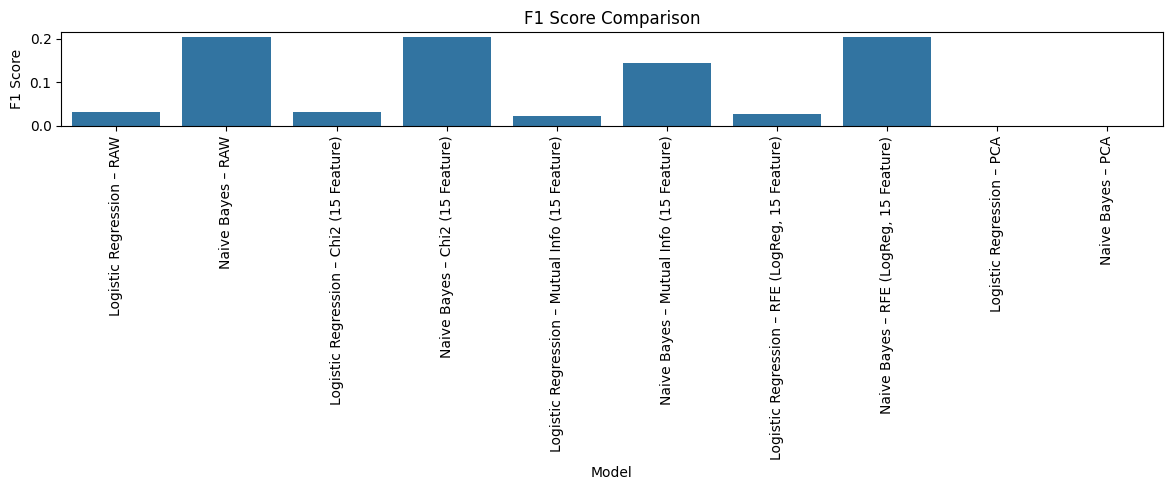

In [9]:
# SONUÇ TABLOSU

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "AUC"])
display(results_df)

plt.figure(figsize=(12,5))
sns.barplot(data=results_df, x="Model", y="F1 Score")
plt.xticks(rotation=90)
plt.title("F1 Score Comparison")
plt.tight_layout()
plt.show()


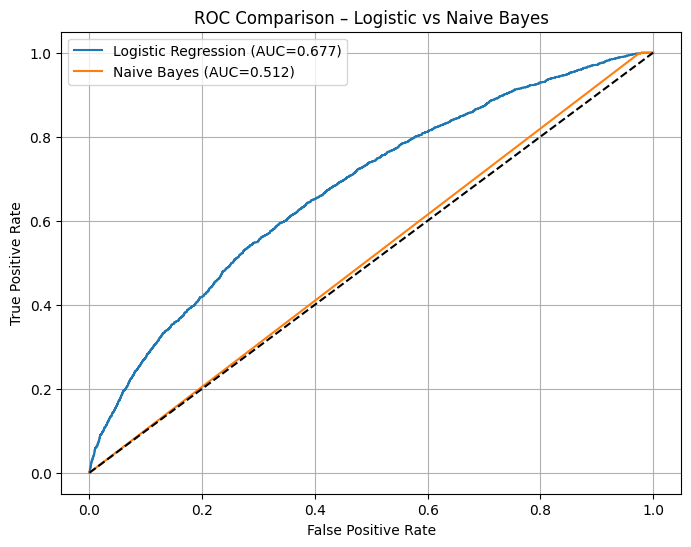

In [10]:
# ROC Eğrisi

plt.figure(figsize=(8,6))

for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    y_prob = model.predict_proba(X_test_std)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_val:.3f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison – Logistic vs Naive Bayes")
plt.legend()
plt.grid()
plt.show()
